In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
import hydroeval as he
path = '/mnt/ufs18/home-119/azmatmun/IBM_backup/AAAI_results/'

<ipython-input-325-6146d4112867>:36: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ok" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.arange(10), means, std, fmt='ok' ,marker='s', mfc='red', mec='black', ms=8, mew=2)


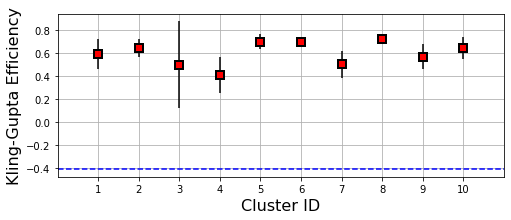

In [325]:
# Kling-Gupta Efficiency of TGCN

kge_mean =[]
kge_std =[]
kge_min =[]
kge_max =[]
for cl in range(12):
    if cl ==8 or cl==9:
        continue 
    else:
        yhat = np.load(path+'Tgcn_Y_pred_seq_12_cluster_'+str(cl)+'.npy')
        ygt = np.load(path+'Tgcn_Y_test_seq_12_cluster_'+str(cl)+'.npy')
        s = yhat.shape[0]
        d = yhat.shape[1]
        sim = np.reshape(yhat,(d,s*12))
        evl = np.reshape(ygt,(d,s*12))

        kge_smpl=[]
        for i in range(10):
            h_smpl = np.random.randint(0,d)
            kge, r, alpha, beta = he.evaluator(he.kgenp, sim[h_smpl,:], evl[h_smpl,:])
            kge_smpl.append(kge)
        kge_mean.append(np.mean(kge_smpl))
        kge_std.append(np.std(kge_smpl))
        kge_min.append(min(kge_smpl))
        kge_max.append(max(kge_smpl))

# create stacked errorbars:
means = np.array(kge_mean)
std = np.array(kge_std)
mins = np.array(kge_min)
maxes = np.array(kge_max)

plt.figure(figsize =(8,3))
# plt.errorbar(np.arange(10), means, std, fmt='ok', lw=4)
plt.errorbar(np.arange(10), means, std, fmt='ok' ,marker='s', mfc='red', mec='black', ms=8, mew=2)
plt.plot(np.arange(-1,11),(-0.41)*np.ones(12), '--b')
plt.xlim(-1, 10)
plt.xticks(np.arange(10) , labels=np.arange(10)+1)
plt.xlabel('Cluster ID', fontsize=16)
plt.ylabel('Kling-Gupta Efficiency', fontsize=16)
plt.grid()


<ipython-input-20-aa5235105568>:32: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ok" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(np.arange(10), means, std, fmt='ok' ,marker='s', mfc='red', mec='black', ms=8, mew=2)


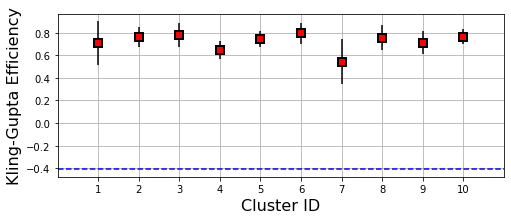

In [20]:
# Kling-Gupta Efficiency of TGCN SINGEL STEP

kge_mean =[]
kge_std =[]
kge_min =[]
kge_max =[]
for cl in range(12):
    if cl ==8 or cl==9:
        continue 
    else:
        yhat = np.load(path+'Tgcn_Y_pred_seq_1_cluster_'+str(cl)+'.npy')
        ygt = np.load(path+'Tgcn_Y_test_seq_1_cluster_'+str(cl)+'.npy')
        d = yhat.shape[1]
        kge_smpl=[]
        for i in range(30):
            h_smpl = np.random.randint(0,d)
            kge, r, alpha, beta = he.evaluator(he.kgenp, yhat[:,h_smpl,:], ygt[:,h_smpl,:])
            kge_smpl.append(kge)
        kge_mean.append(np.mean(kge_smpl))
        kge_std.append(np.std(kge_smpl))
        kge_min.append(min(kge_smpl))
        kge_max.append(max(kge_smpl))

# create stacked errorbars:
means = np.array(kge_mean)
std = np.array(kge_std)
mins = np.array(kge_min)
maxes = np.array(kge_max)

plt.figure(figsize =(8,3))
# plt.errorbar(np.arange(10), means, std, fmt='ok', lw=4)
plt.errorbar(np.arange(10), means, std, fmt='ok' ,marker='s', mfc='red', mec='black', ms=8, mew=2)
plt.plot(np.arange(-1,11),(-0.41)*np.ones(12), '--b')
plt.xlim(-1, 10)
plt.xticks(np.arange(10) , labels=np.arange(10)+1)
plt.xlabel('Cluster ID', fontsize=16)
plt.ylabel('Kling-Gupta Efficiency', fontsize=16)
plt.grid()


In [2]:

tgcn1=[]
tgcn12=[]
pers1=[]
pers12=[]
lstm1=[]
lstm12=[]

tmp1 = np.load(path + 'LSTM_SingleStep_mse.npy')
tmp12 = np.load(path+ 'LSTM_Multistep_mse.npy')

for i in range(12):
    if i ==8 or i==9 :
        continue 
    else: 
        tgcn1.append(np.load(path + 'Tgcn_mse_seq_1_cluster_'+str(i)+'.npy').tolist())
        tgcn12.append(np.load(path + 'Tgcn_mse_seq_12_cluster_'+str(i)+'.npy').tolist())
        pers1.append(np.load(path + 'Pers_mse_seq_1_cluster_'+str(i)+'.npy').tolist())
        pers12.append(np.load(path + 'Pers_mse_seq_12_cluster_'+str(i)+'.npy').tolist())
        lstm12.append(tmp1[i])
        lstm1.append(tmp12[i])

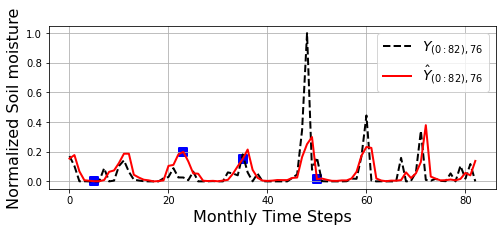

In [6]:
fs = 14
lw = 2

# # EXP 1 
# tsteps = np.array([0 , 28, 57 , 64])
# cl_id = 11
# hru = 10

# EXP 2 
tsteps = np.array([5,23,35,50])
cl_id = 6
hru = 76

yhat = np.load(path+'Tgcn_Y_pred_seq_1_cluster_'+str(cl_id)+'.npy')
ygt = np.load(path+'Tgcn_Y_test_seq_1_cluster_'+str(cl_id)+'.npy')

plt.figure(figsize=(8,3))
plt.plot(ygt[:,hru,:], '--k', label='$Y_{(0:82), 76}$', linewidth=lw)
plt.plot(yhat[:,hru,:], 'r',   label='$\hat{Y}_{(0:82), 76}$', linewidth=lw)
plt.scatter(tsteps, yhat[tsteps, hru ,:], c ="blue", linewidths = lw, marker ="s", edgecolor ="blue", s = 50)
plt.xlabel('Monthly Time Steps', fontsize = 16)
plt.ylabel('Normalized Soil moisture', fontsize = 16)
plt.legend(fontsize=fs, loc='upper right')
plt.grid()


[ 0 28 57 64]


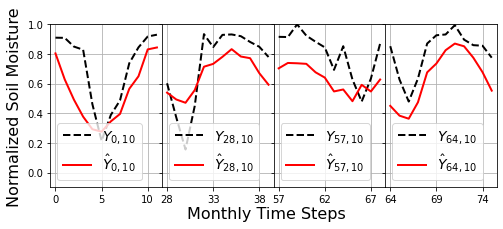

In [321]:
yhat = np.load(path+'Tgcn_Y_pred_seq_12_cluster_'+str(cl_id)+'.npy')
ygt = np.load(path+'Tgcn_Y_test_seq_12_cluster_'+str(cl_id)+'.npy')

xticks = [0,5,10]

fig, ax = plt.subplots(1,4, figsize =(8,3) , sharey = True) 

ax[0].plot(ygt[tsteps[0],hru,:], '--k', label='$Y_{0, 10}$', linewidth=lw)
ax[0].plot(yhat[tsteps[0],hru,:], 'r',  label='$\hat{Y}_{0, 10}$', linewidth=lw)
ax[0].legend(fontsize=fs)
ax[0].set_ylim([-0.1,1])
ax[0].set_xticks(xticks)
ax[0].set_xticklabels([tsteps[0]+x for x in xticks])
ax[0].grid()


ax[1].plot(ygt[tsteps[1],hru,:], '--k', label='$Y_{28, 10}$', linewidth=lw)
ax[1].plot(yhat[tsteps[1],hru,:], 'r',  label='$\hat{Y}_{28, 10}$', linewidth=lw)
ax[1].legend(fontsize=fs)
ax[1].set_xticks(xticks)
ax[1].set_xticklabels([tsteps[1]+x for x in xticks])
ax[1].grid()


ax[2].plot(ygt[tsteps[2],hru,:], '--k', label='$Y_{57, 10}$', linewidth=lw)
ax[2].plot(yhat[tsteps[2],hru,:],'r',  label='$\hat{Y}_{57, 10}$', linewidth=lw)
ax[2].legend(fontsize=fs)
ax[2].set_xticks(xticks)
ax[2].set_xticklabels([tsteps[2]+x for x in xticks])
ax[2].grid()


ax[3].plot(ygt[tsteps[3],hru,:], '--k', label='$Y_{64, 10}$', linewidth=lw)
ax[3].plot(yhat[tsteps[3],hru,:], 'r',  label='$\hat{Y}_{64, 10}$', linewidth=lw)
ax[3].legend(fontsize=fs)
ax[3].set_xticks(xticks)
ax[3].set_xticklabels([tsteps[3]+x for x in xticks])
ax[3].grid()

fig.text(0.05, 0.5, 'Normalized Soil Moisture', fontsize = 16, va='center', rotation='vertical')
fig.text(0.5, -0.02, 'Monthly Time Steps', ha='center', fontsize = 16)

fig.subplots_adjust(wspace=0, hspace=0)

print(tsteps)

In [6]:
# Table Data generator 

for i in range(10):
        rel = (lstm1[i]  - tgcn1[i])*100/lstm1[i]
        # print("{:0.2f}".format(rel))
        print("{:0.4f}".format(lstm1[i]))

0.3433
0.3815
0.3588
0.3057
0.3677
0.4087
0.7326
0.4010
0.4227
0.3847


In [7]:
lstm1

[0.34332812767050824,
 0.3815170448020176,
 0.3588285820523679,
 0.305679004671886,
 0.3677174583836797,
 0.4087265057960421,
 0.7326419471665775,
 0.40095009986360847,
 0.4226812381373159,
 0.38466228531359525]

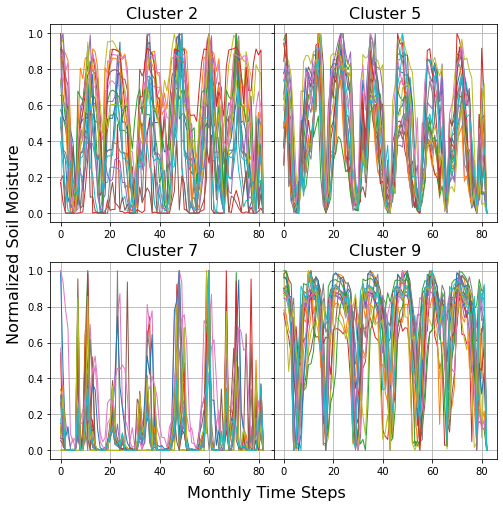

In [175]:

fs = 14
lw = 1
hru1 = np.array([144, 298, 691, 250, 645, 871, 205, 351, 644,  11, 247, 610, 524, 596, 478, 513, 456, 117, 762, 705])
hru6 = np.array([285, 206,  99, 264, 448,  65, 348, 228, 161, 223,  12, 388, 351, 314, 400,  58, 126,  79, 351, 330])
hru4 = np.array([1025,  483,  916,  298,  231,   60,  631,  800,  942,  781,  996, 1128,  992,  903,  350,  652,  505,  683,    6, 1036])
hru10 = np.array([1807,  697, 1668, 2153,  376, 2667,   67,  914, 1522, 1067, 1317, 913,  172, 1867, 2159, 1543, 1132, 2038, 1095, 1935])


fig, ax = plt.subplots(2,2, figsize =(8,6) , sharey = True)

##################################################################################33
cl_id = 1
ygt = np.load(path+'Tgcn_Y_test_seq_1_cluster_'+str(cl_id)+'.npy')

for i in range (len(hru1)):
    ax[0][0].plot(ygt[:,hru1[i],:], linewidth=lw)

ax[0][0].set_title('Cluster 2', fontsize = 16)
ax[0][0].grid()

##################################################################################33

cl_id = 4
ygt = np.load(path+'Tgcn_Y_test_seq_1_cluster_'+str(cl_id)+'.npy')

for i in range (len(hru4)):
    ax[0][1].plot(ygt[:,hru4[i],:], linewidth=lw)

ax[0][1].set_title('Cluster 5', fontsize = 16)
ax[0][1].grid()

##################################################################################33
cl_id = 6
ygt = np.load(path+'Tgcn_Y_test_seq_1_cluster_'+str(cl_id)+'.npy')

for i in range (len(hru6)):
    ax[1][0].plot(ygt[:,hru6[i],:], linewidth=lw)

ax[1][0].set_title('Cluster 7', fontsize = 16)
ax[1][0].grid()


##################################################################################33
cl_id = 10
ygt = np.load(path+'Tgcn_Y_test_seq_1_cluster_'+str(cl_id)+'.npy')

for i in range (len(hru10)):
    ax[1][1].plot(ygt[:,hru10[i],:], linewidth=lw)

ax[1][1].set_title('Cluster 9', fontsize = 16)
ax[1][1].grid()


fig.text(0.05, 0.5, 'Normalized Soil Moisture', fontsize = 16, va='center', rotation='vertical')
fig.text(0.5, 0.05, 'Monthly Time Steps', ha='center', fontsize = 16)

fig.subplots_adjust(wspace=0, hspace=0.3)


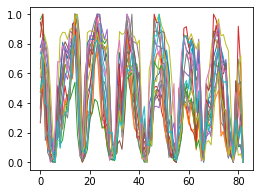

In [163]:
##################################################################################33
cl_id = 4
ygt = np.load(path+'Tgcn_Y_test_seq_1_cluster_'+str(cl_id)+'.npy')
hru = np.random.randint(0,ygt.shape[1], 20)

plt.figure(figsize=(4,3))
for i in range (len(hru)):
    plt.plot(ygt[:,hru[i],:], linewidth=lw)



In [164]:
hru4 = hru

In [135]:
hru7 = hru

In [137]:
hru7_2 = hru

In [146]:
hru5=hru

In [148]:
hru1=hru

In [165]:
hru4

array([1025,  483,  916,  298,  231,   60,  631,  800,  942,  781,  996,
       1128,  992,  903,  350,  652,  505,  683,    6, 1036])